# EDA - Exploratory Data Analysis

Un EDA es un tratamiento estadístico al que se someten las muestras recogidas durante un proceso de investigación en cualquier campo científico. Los principales objetivos en este estudio son:
- Maximizar el conocimiento de un conjunto de datos
- Descubrir su estructura
- Extraer variables importantes
- Detectar valores atípicos y anomalías (outliers)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
data_path = Path('data')

%matplotlib inline

## 1. Extracción de datos

In [2]:
data = pd.read_csv(data_path / 'winequality_own.csv')
print(data.shape)
data.head(5)

(1599, 12)


,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,NaN,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Variables y tipos de datos

In [3]:
data.dtypes

fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

Este problema se puede enfocar de diferentes maneras:

- 1. Problema de clasificación multiclase.
- 2. Problema de regresión. Suponemos un vino con calidad 4.5 aquel que tiene un valor entre 4 y 5
- 3. Convertir el problema en una clasificación binaria. Todos aquellos vinos con calidad >= 7 serán considerados vinos "buenos". Aquellos con calidad menor, serán considerados vinos "malos"

In [4]:
data.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1539.000000,1599.000000,1542.000000,1599.000000,1514.000000,1599.000000,1545.00000,1549.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.271144,2.538806,0.087401,15.874922,46.661162,0.996747,3.31134,0.658896,10.422983,5.636023
std,1.741096,0.179060,0.195013,1.409928,0.046734,10.460157,32.843504,0.001887,0.15471,0.171362,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.74000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.21000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.31000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.40000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.01000,2.000000,14.900000,8.000000


In [5]:
data['quality'] = [0 if q <7 else 1 for q in data['quality']]
data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

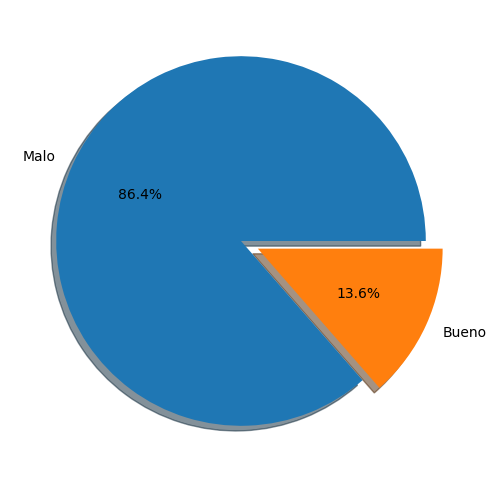

In [47]:
porc = data['quality'].value_counts(normalize = True)

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(porc, labels=['Malo', 'Bueno'], autopct='%1.1f%%', shadow = True, explode = [0, 0.1]);

## 3. Datos missings

In [7]:
data.isnull().sum()

fixedacidity           0
volatileacidity        0
citricacid            60
residualsugar          0
chlorides             57
freesulfurdioxide      0
totalsulfurdioxide    85
density                0
pH                    54
sulphates             50
alcohol                0
quality                0
dtype: int64

Porcentaje de datos que faltan:

In [8]:
_ = data.isnull().sum() / data.shape[0] * 100
_[_ > 0]

citricacid            3.752345
chlorides             3.564728
totalsulfurdioxide    5.315822
pH                    3.377111
sulphates             3.126954
dtype: float64

Podemos hacer dos cosas:

1. Dejarlos tal y como están por ahora, y continuar nuestro análisis con estos missings. Podríamos tener problemas a la hora de realizar algunos gráficos.
2. Imputarlos por algún valor numérico. Solucionamos el valor missing pero estamos modificando (o inventándonos algunos datos)

En nuestro caso, vamos a imputar los valores missings. Nosotros lo haremos por la media de cada variable

In [9]:
data['citricacid'].fillna(data['citricacid'].mean(), inplace = True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace = True)
data['totalsulfurdioxide'].fillna(data['totalsulfurdioxide'].mean(), inplace = True)
data['pH'].fillna(data['pH'].mean(), inplace = True)
data['sulphates'].fillna(data['sulphates'].mean(), inplace = True)

O programarlo en un bucle...

In [10]:
cols_to_impute = _[_>0].index
cols_to_impute

Index(['citricacid', 'chlorides', 'totalsulfurdioxide', 'pH', 'sulphates'], dtype='object')

In [11]:
for col in cols_to_impute:
    data[col].fillna(data[col].mean(), inplace = True)

In [12]:
data.isnull().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

## 4. Distribución de variables

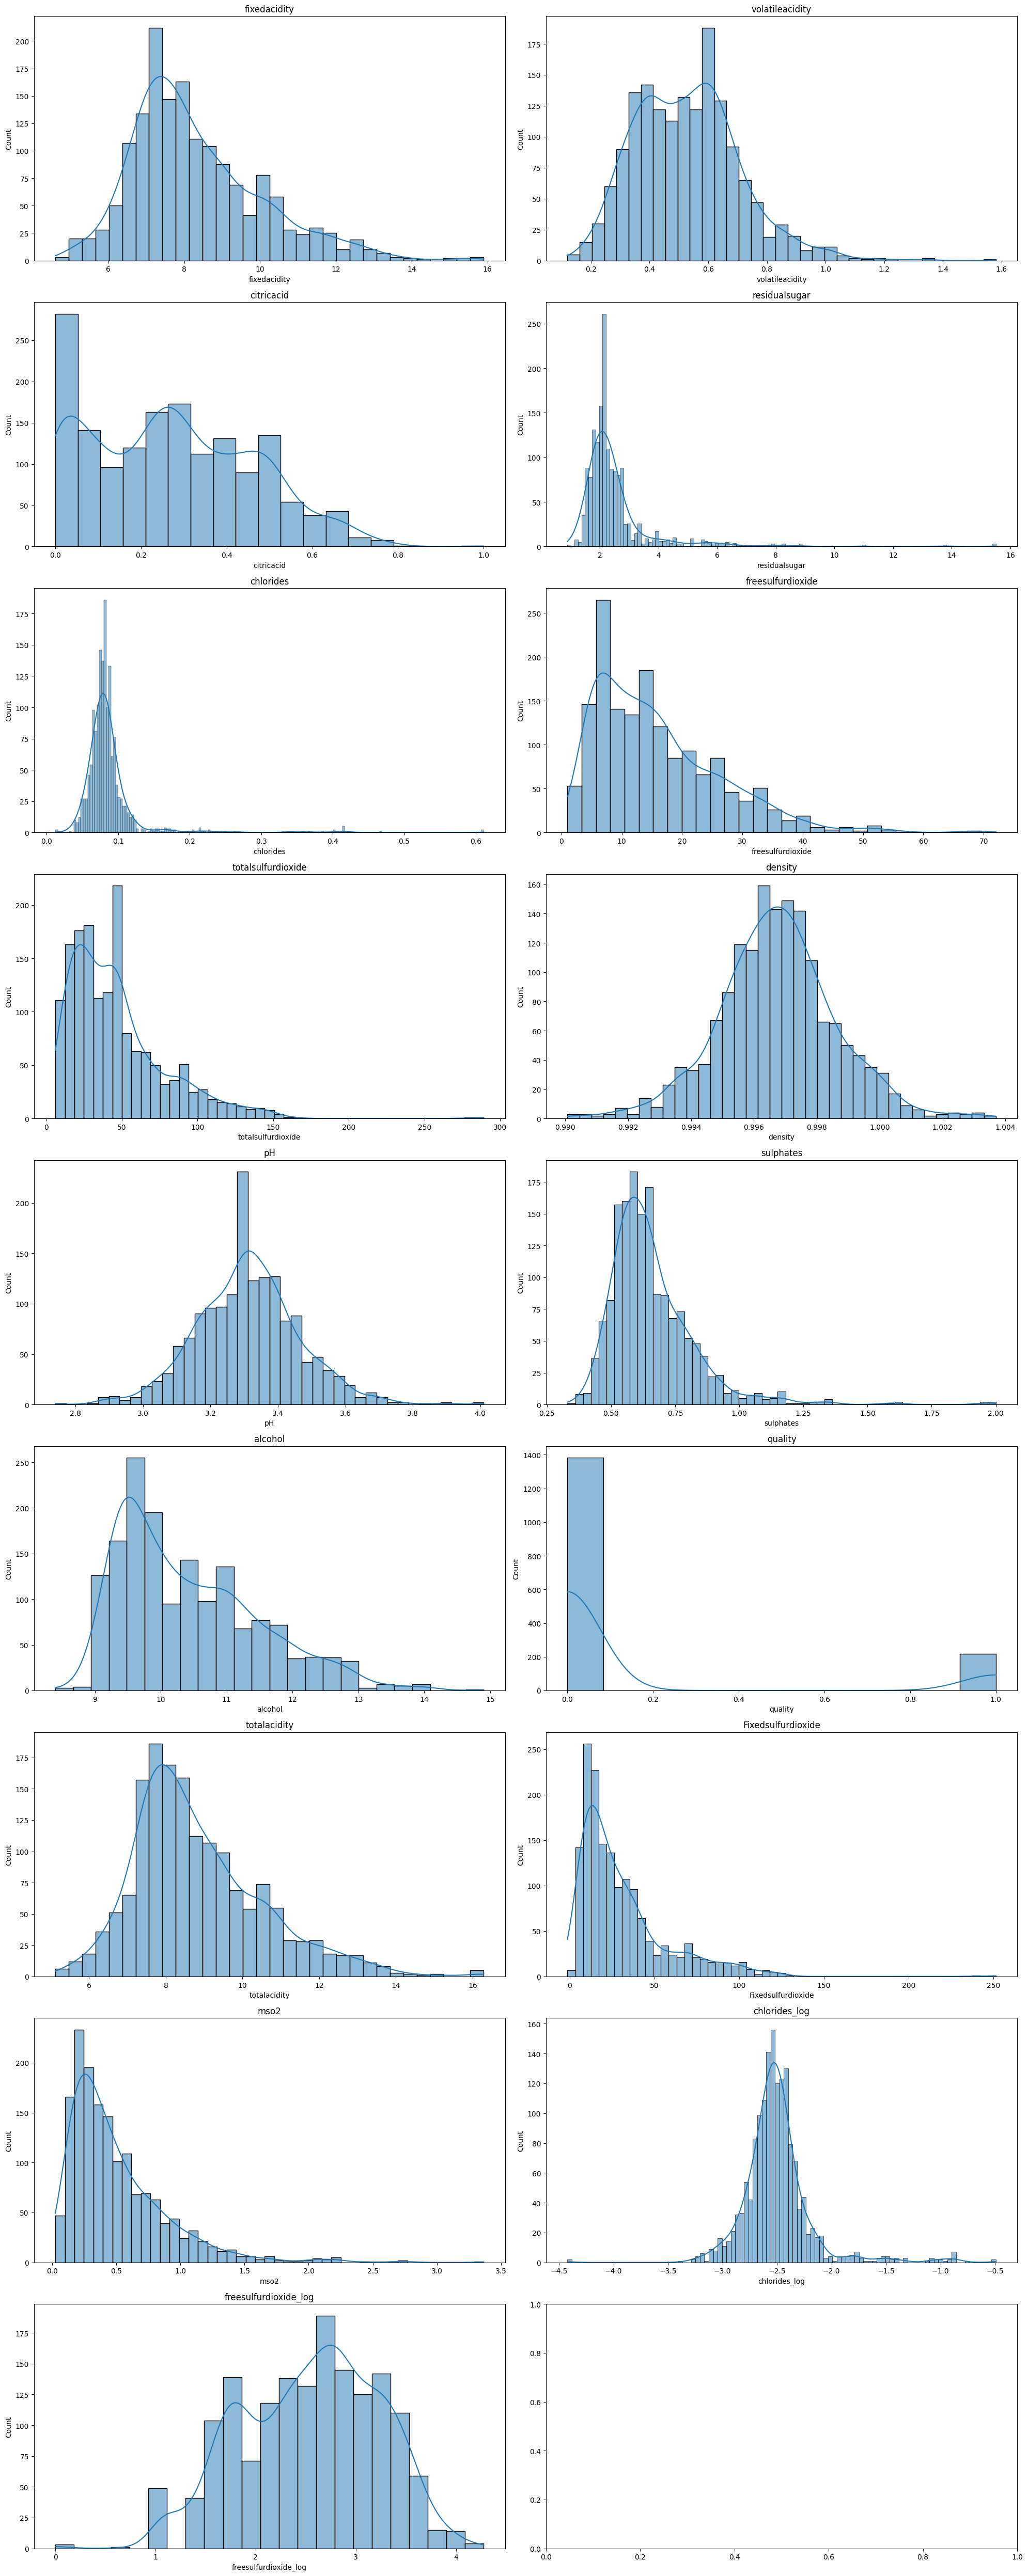

In [56]:
cols = data.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 50))

i,j = 0,0
for c in cols:
    sns.histplot(data[c], kde = True, ax = ax[i,j])
    ax[i,j].set_title(c)
    j+=1
    if j==2:
        i+=1
        j=0
        
plt.tight_layout()

Vamos a medir ahora el *skewness* y la *kurtosis* de cada variable.

- El skewness es una medida de simetría. Un dataset simétrico, posee un skewness igual a 0. Una distribución normal posee un skewness igual 0.
- La kurtosis es una medida de las colas de la distribución. Cuanto mayor peso tengan las colas, mayor es la kurtosis. Una kurtosis igual a cero se aproximaría a una distribución normal.

In [14]:
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------fixedacidity------
Skewness: 0.982751
Kurtosis: 1.132143
------volatileacidity------
Skewness: 0.671593
Kurtosis: 1.225542
------citricacid------
Skewness: 0.330718
Kurtosis: -0.698193
------residualsugar------
Skewness: 4.540655
Kurtosis: 28.617595
------chlorides------
Skewness: 5.778518
Kurtosis: 43.628176
------freesulfurdioxide------
Skewness: 1.250567
Kurtosis: 2.023562
------totalsulfurdioxide------
Skewness: 1.562631
Kurtosis: 4.329415
------density------
Skewness: 0.071288
Kurtosis: 0.934079
------pH------
Skewness: 0.201399
Kurtosis: 0.947990
------sulphates------
Skewness: 2.452750
Kurtosis: 11.967317
------alcohol------
Skewness: 0.860829
Kurtosis: 0.200029
------quality------
Skewness: 2.129363
Kurtosis: 2.537360


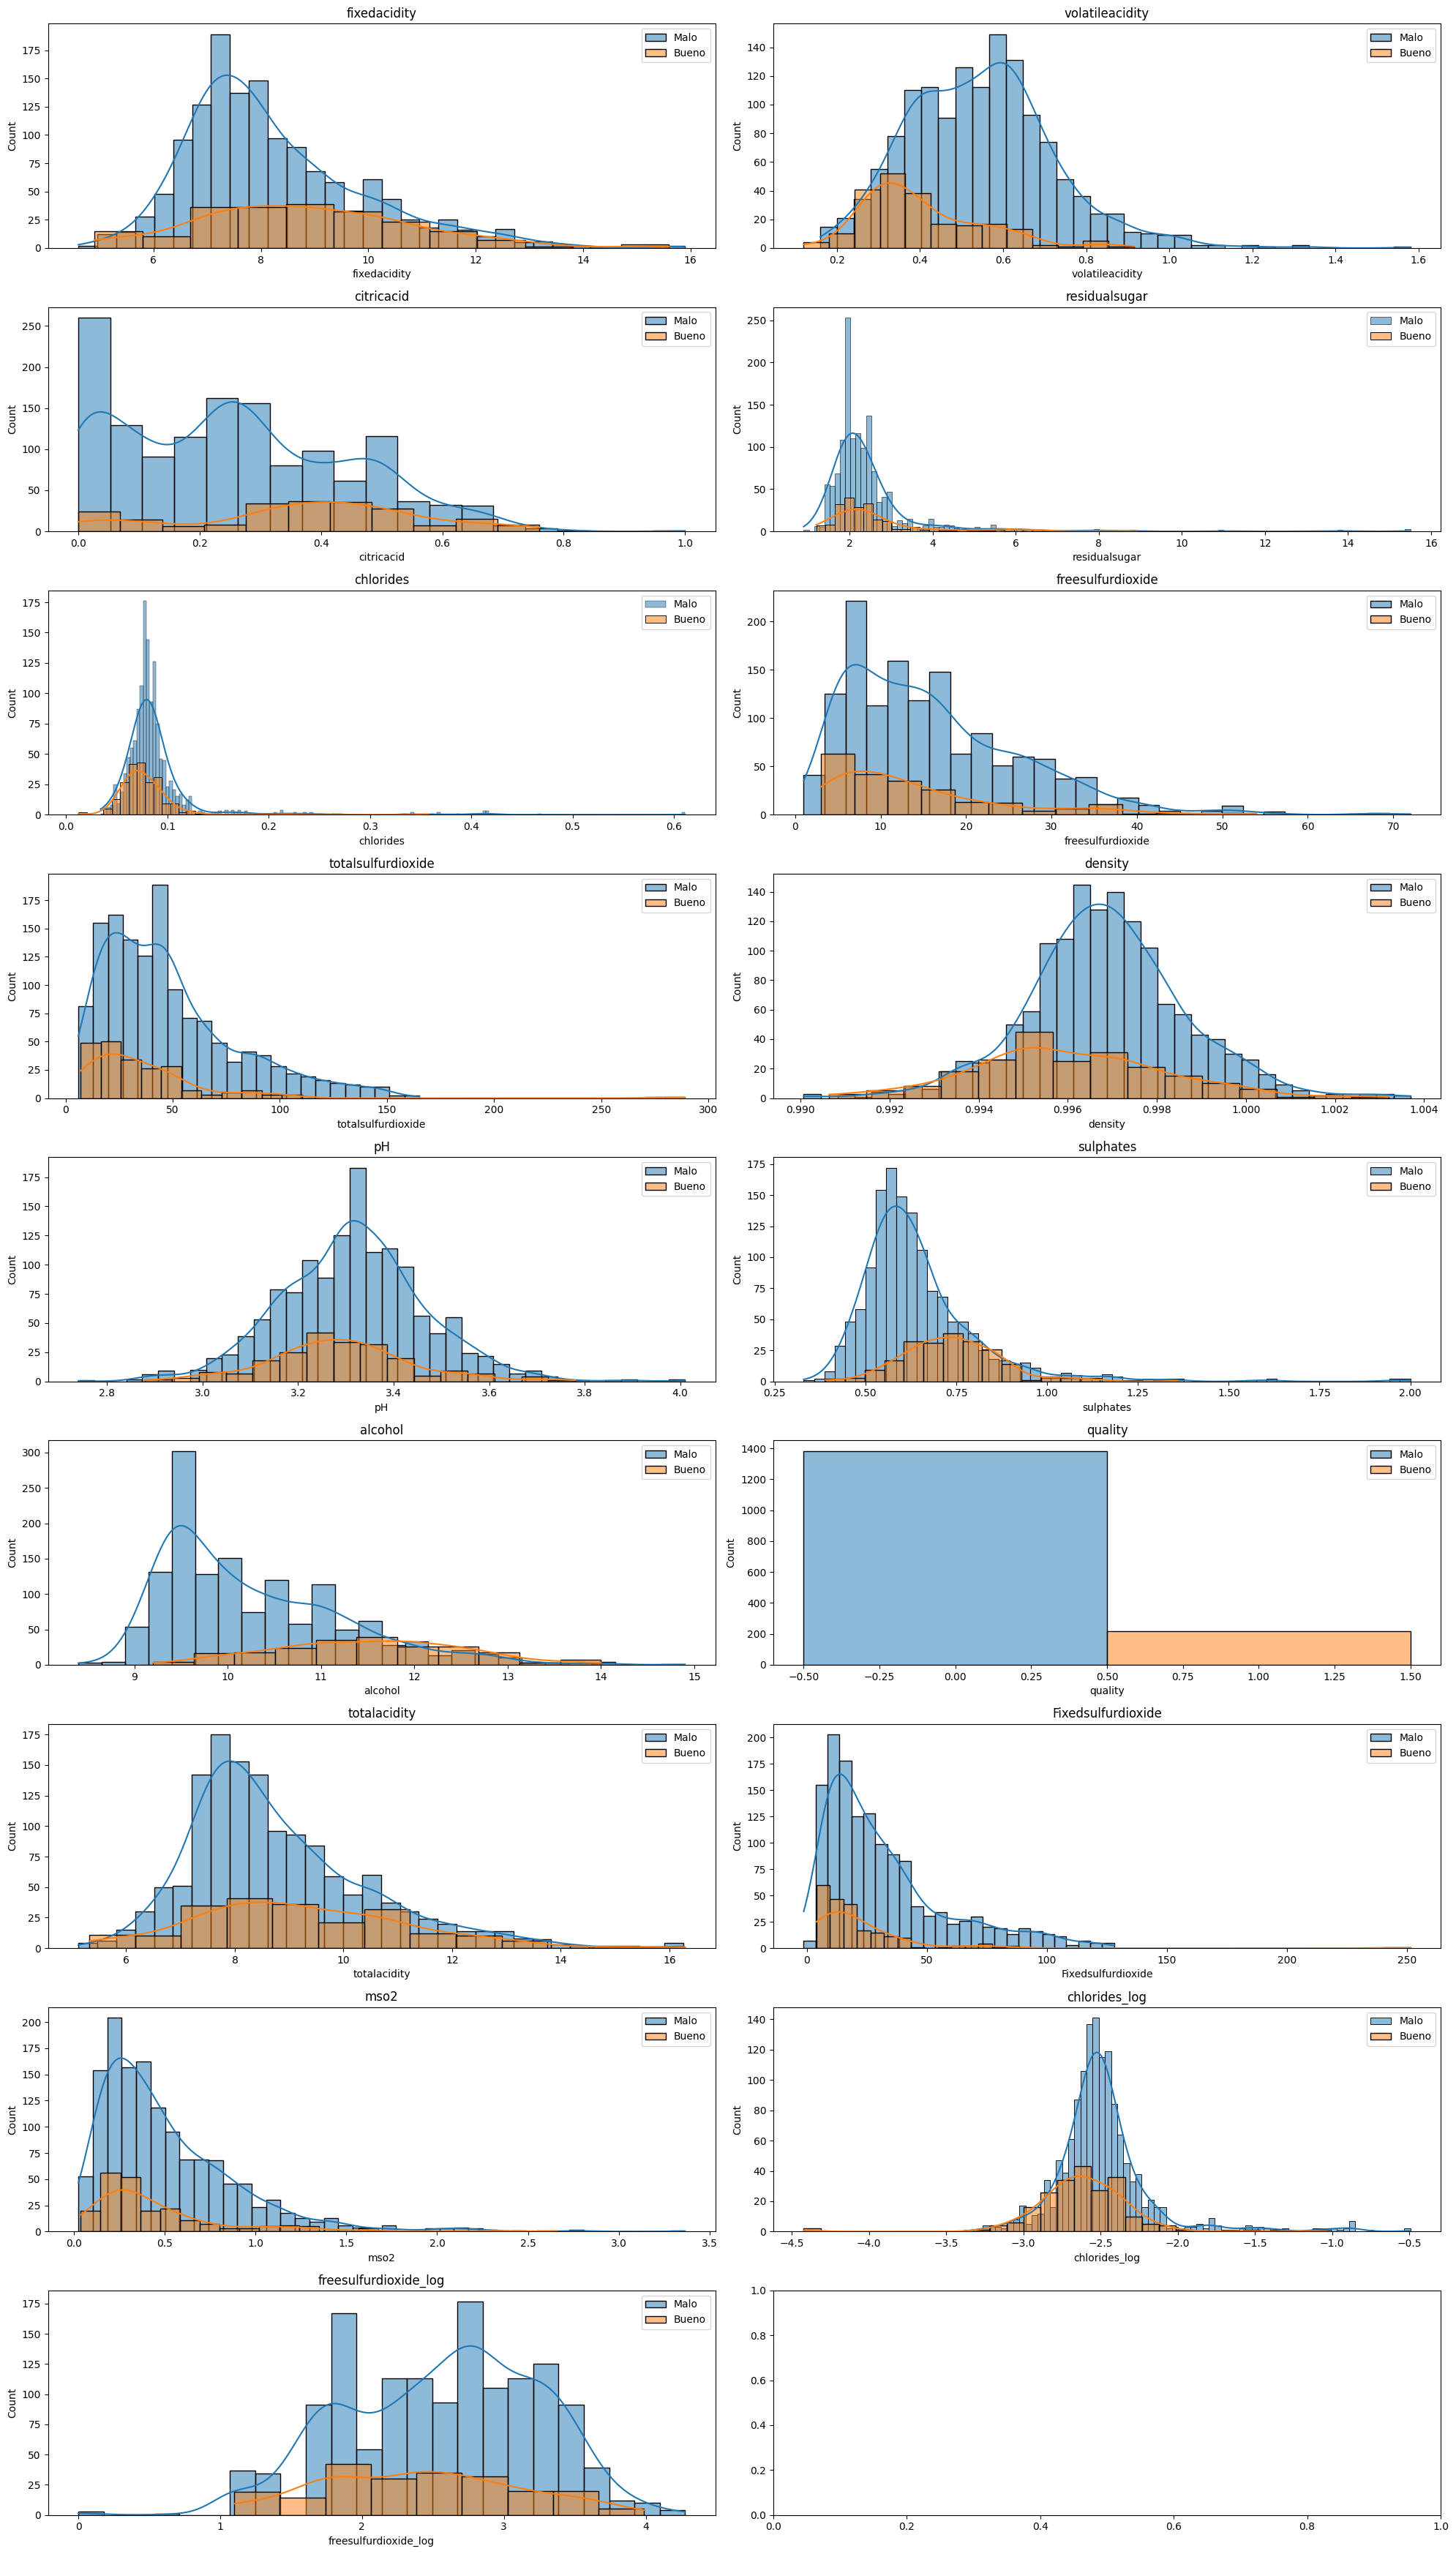

In [55]:
cols = data.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:
    sns.histplot(data.query('quality == 0')[c], kde = True, ax = ax[i,j], label = 'Malo')
    sns.histplot(data.query('quality == 1')[c], kde = True, ax = ax[i,j], label = 'Bueno')

    ax[i,j].set_title(c)
    ax[i,j].legend()
    
    j+=1
    if j==2:
        i+=1
        j=0
        
plt.tight_layout()

## 5. Valores anómalos (outliers)

Vamos a analizar si tenemos valores anómalos, u outliers. Los outliers por definición son observaciones con valores extraños, bien excesivamente altos, o excesivamente bajos.

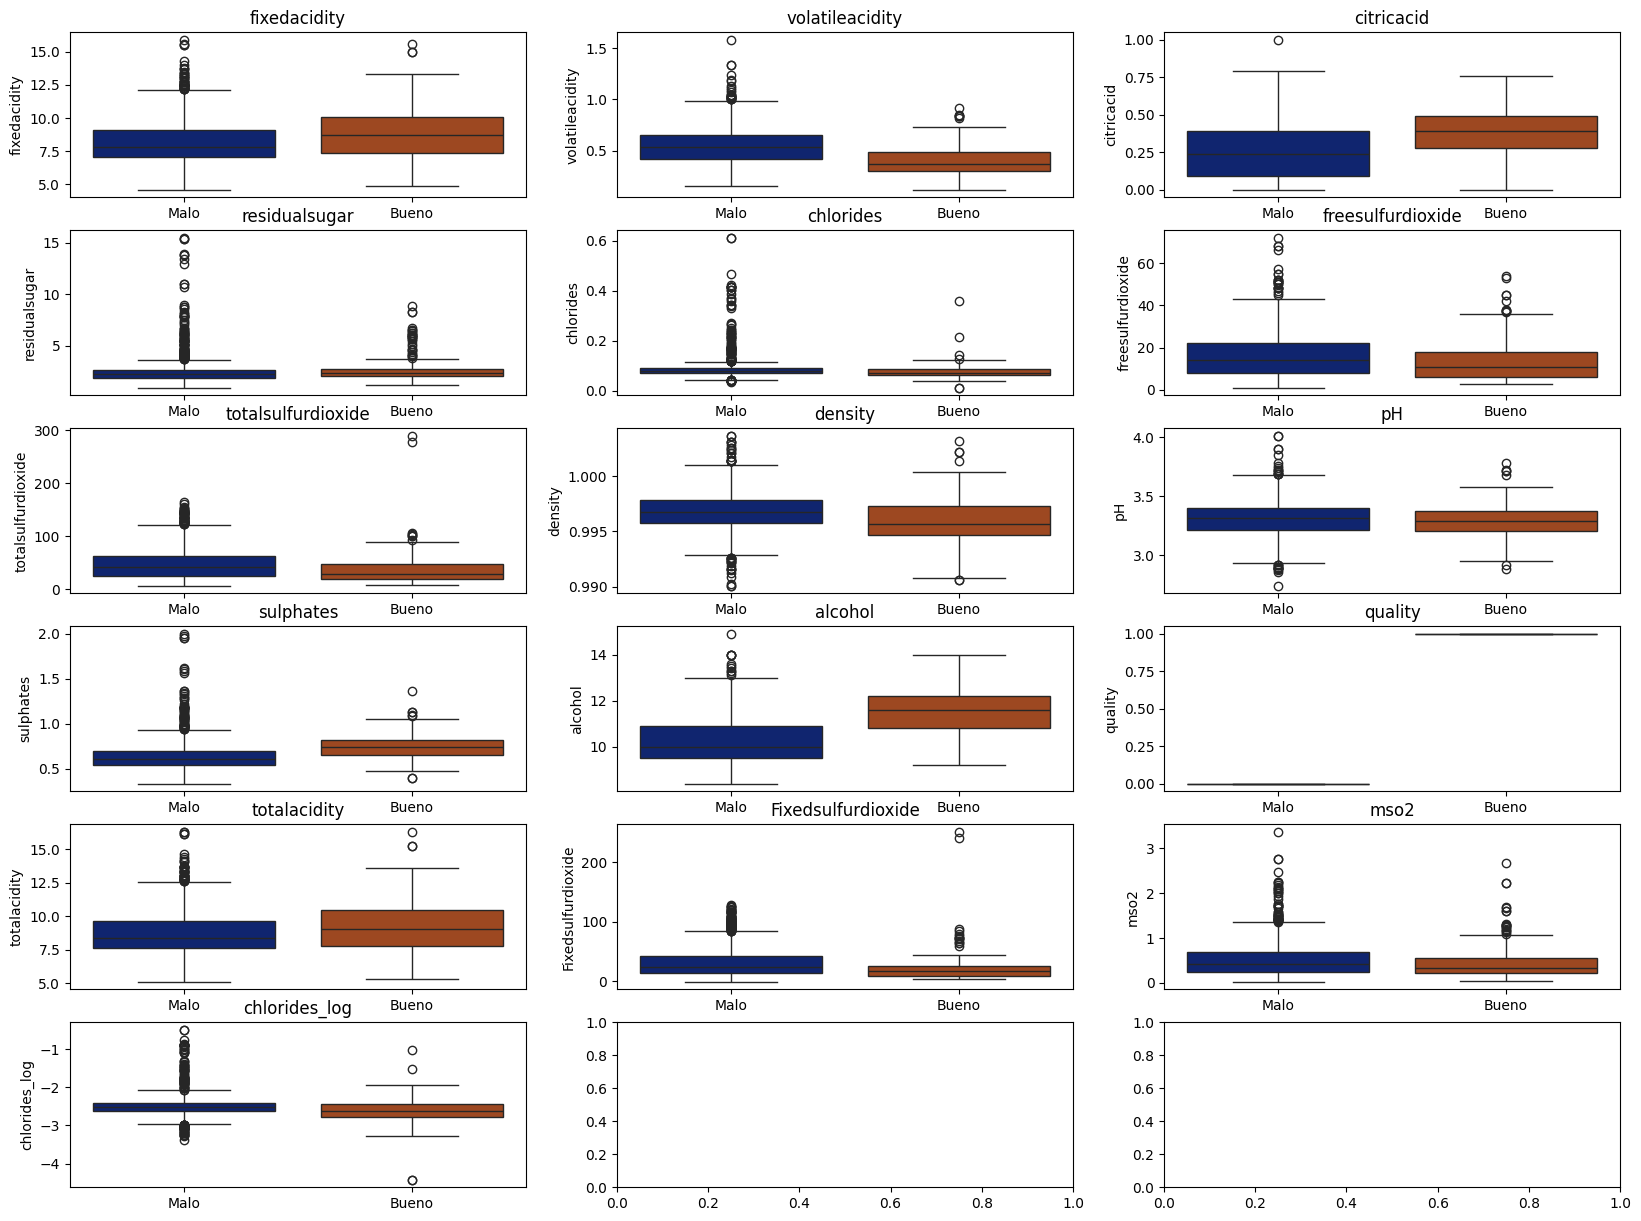

In [59]:
fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/3)), ncols = 3, figsize = (20, 15))

i,j = 0,0
for c in cols.delete(-1):
    sns.boxplot(x = 'quality', y = c, data = data, ax = ax[i,j], palette='dark')
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('')
    ax[i,j].set_xticklabels(np.array(['Malo', 'Bueno']))
    
    j+=1
    if j==3:
        j=0
        i+=1


## 6. Correlación entre variables

Con la correlación de variables vamos a poder sacar varias conclusiones:

1. Variables con una alta correlación nos están dando aproximadamente la misma, por lo que podríamos desprendernos de una de ellas.
2. Variables con una alta correlación con el target serán variables importantes en nuestro modelo

<Axes: >

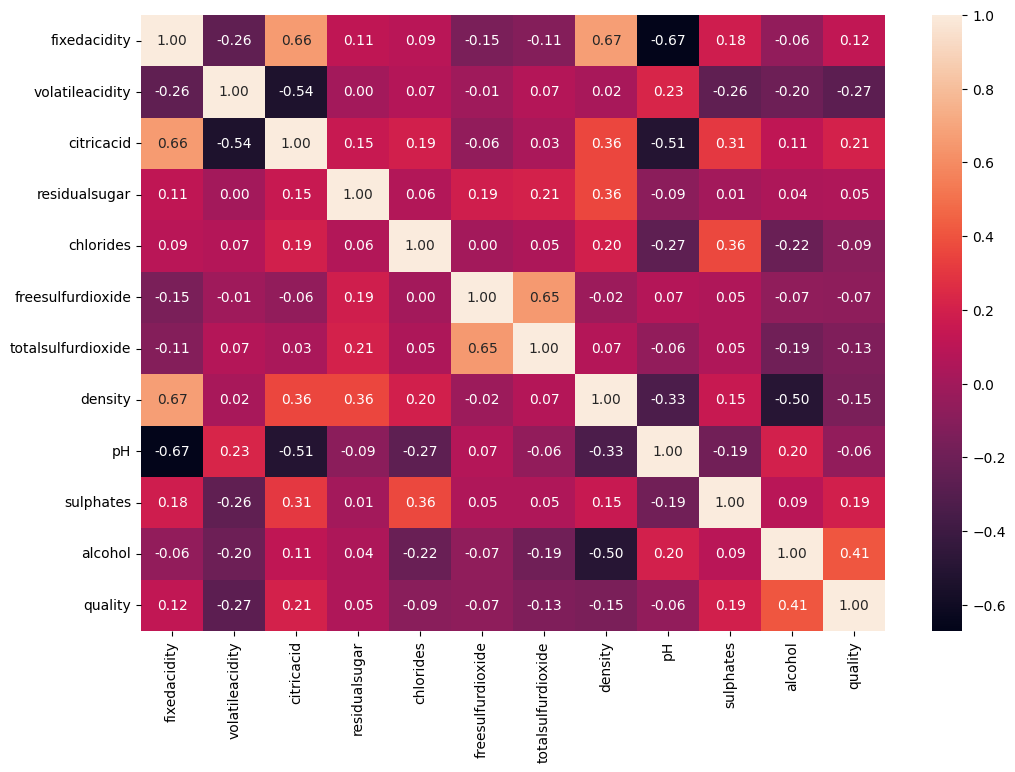

In [17]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr(), annot=True, fmt = '.2f')

- Una correlación positiva &rarr; Cuanto mayor sea una variable, mayor será la otra.
- Una correlación negativa &rarr; Cuanto mayor sea una variable, menor será la otra.


<Axes: >

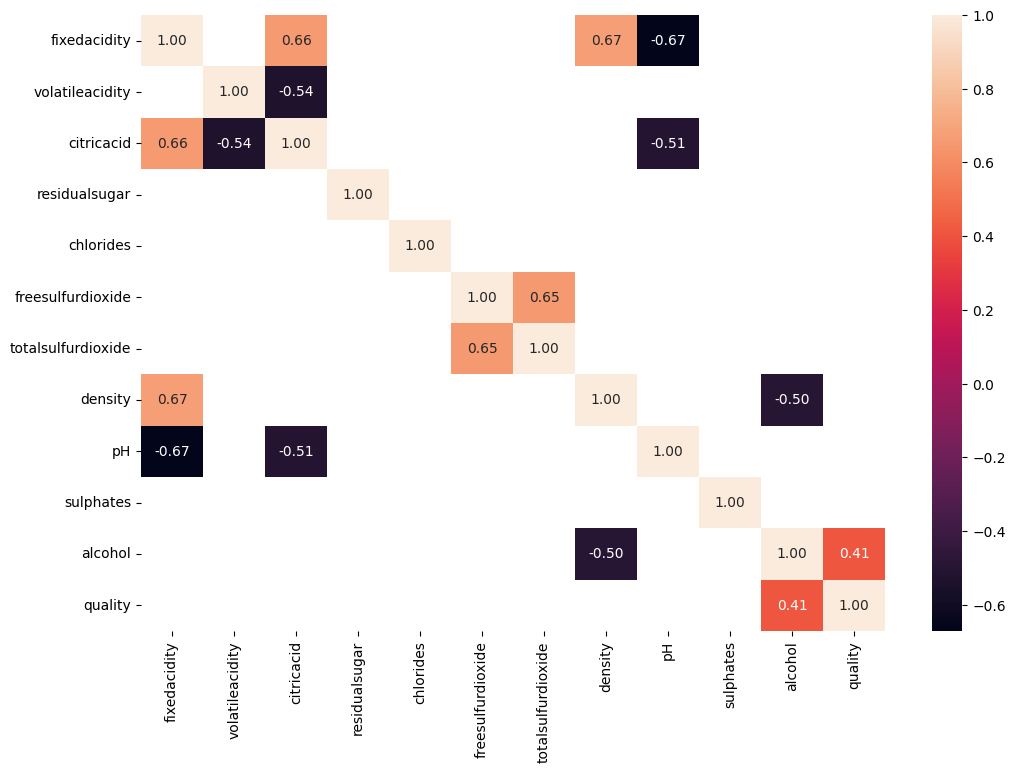

In [18]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr()[(data.corr() > 0.4) | (data.corr() < -0.4)], annot=True, fmt = '.2f')

Veamos algunos gráficos de regresión entre estas variables

In [19]:
import matplotlib.pyplot as plt

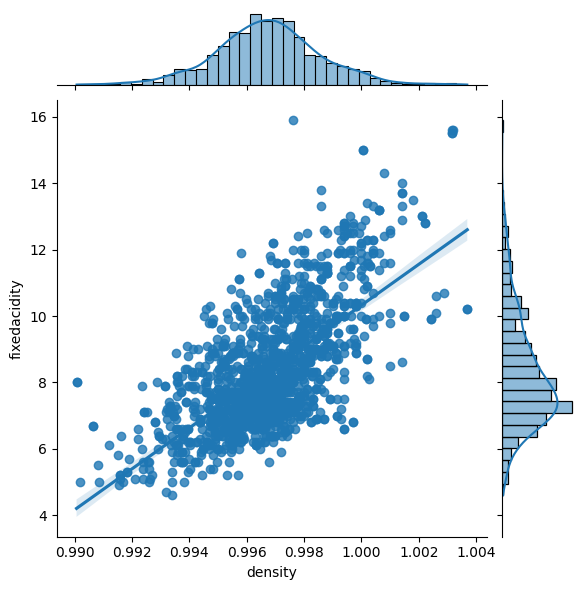

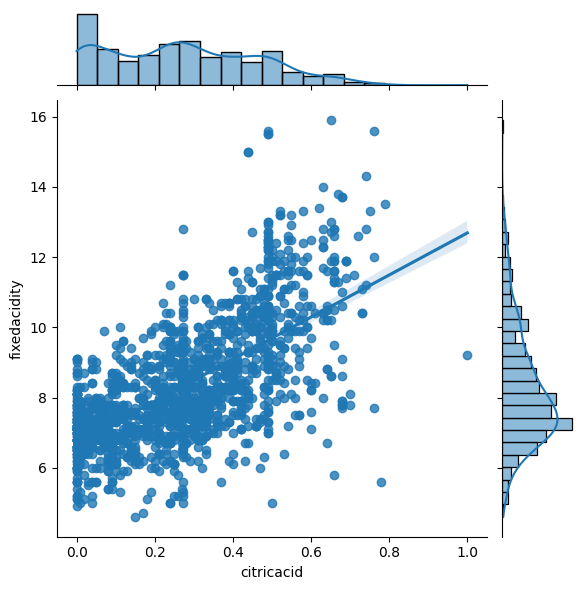

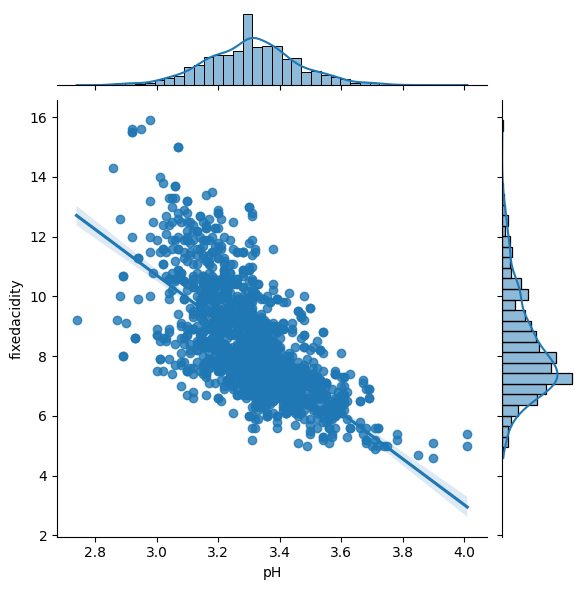

In [20]:
corr_col = ['density', 'citricacid', 'pH']

for c in corr_col:
    sns.jointplot(x = c, y = 'fixedacidity', data = data, kind = 'reg')


Veamos los mismos gráficos, pero ahora fijamos la variable pH.

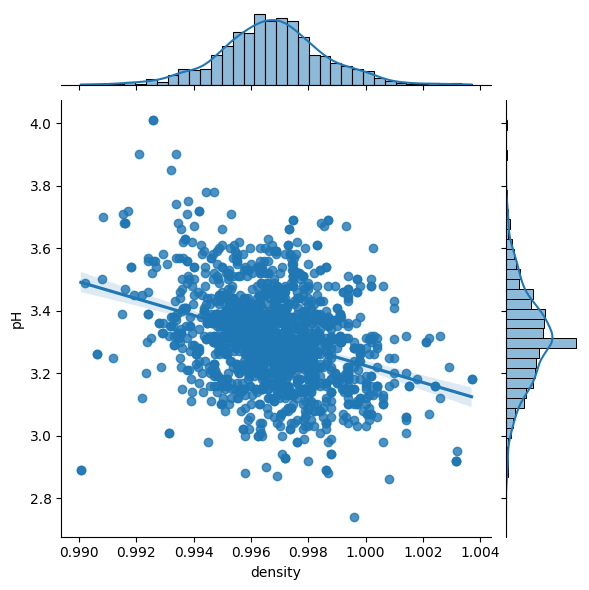

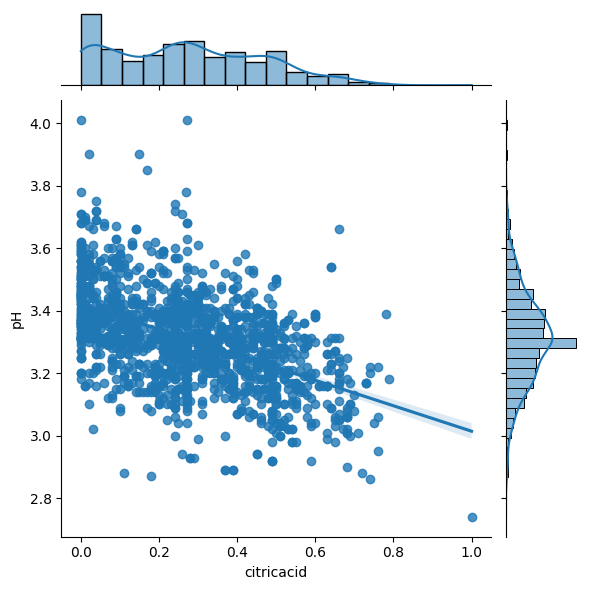

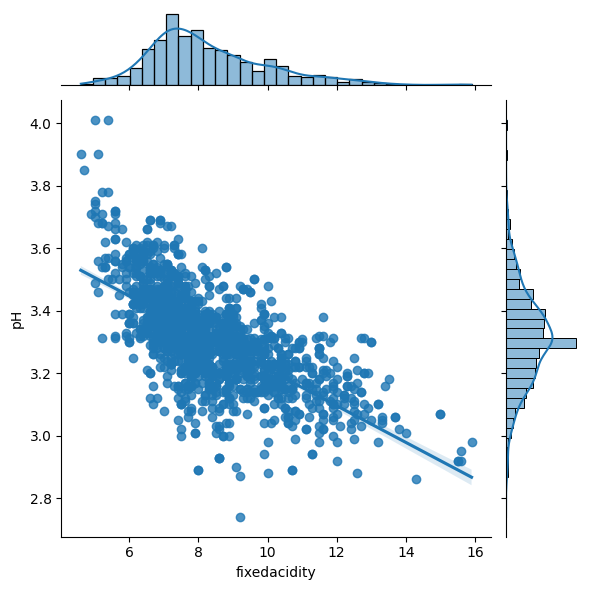

In [21]:
corr_col = ['density', 'citricacid', 'fixedacidity']

for c in corr_col:
    sns.jointplot(x = c, y = 'pH', data = data, kind = 'reg')


Vamos a crear un PairGrid para plotear histogramas, gráficos de puntos y gráficos de distribución.

In [22]:
cols

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

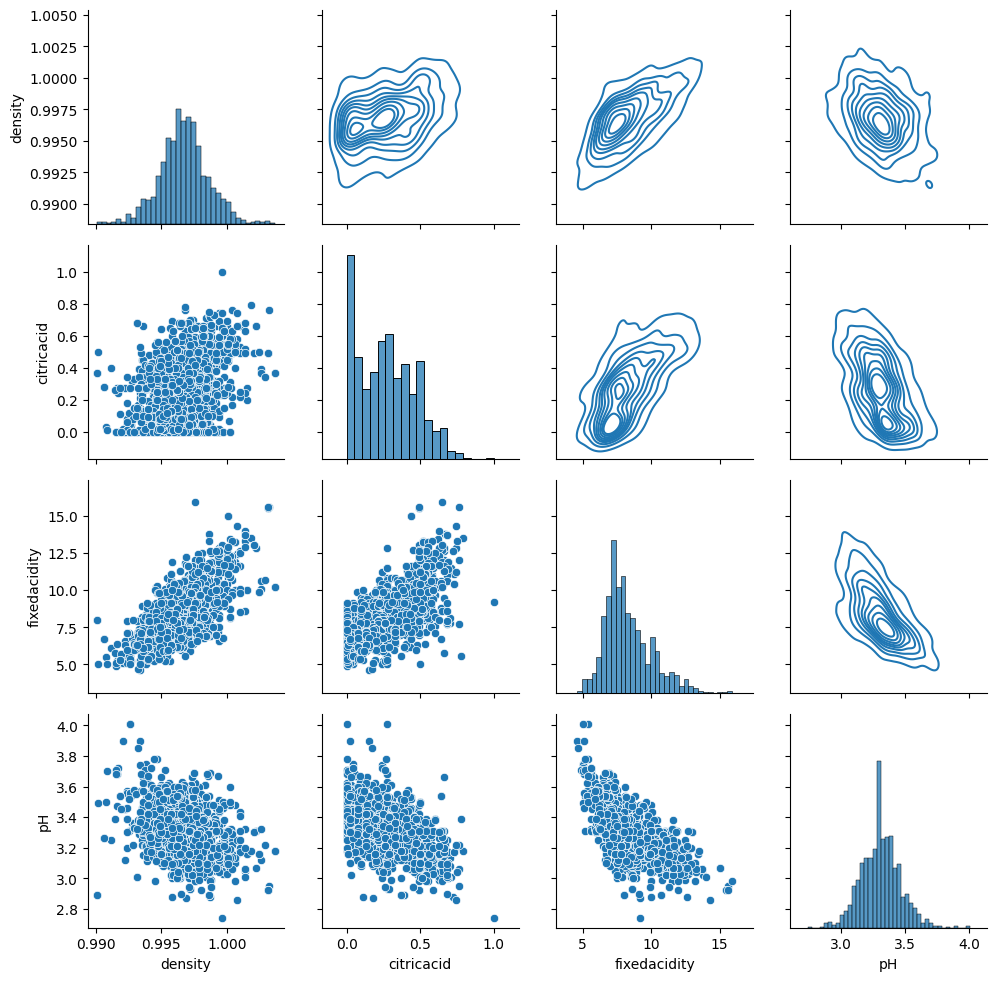

In [23]:
g = sns.PairGrid(data = data, vars = ['density', 'citricacid', 'fixedacidity', 'pH'])
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

Desde mi punto de vista, dado la alta correlación y según lo que marca el regplot, podríamos prescindir de alguna de estas variables. 

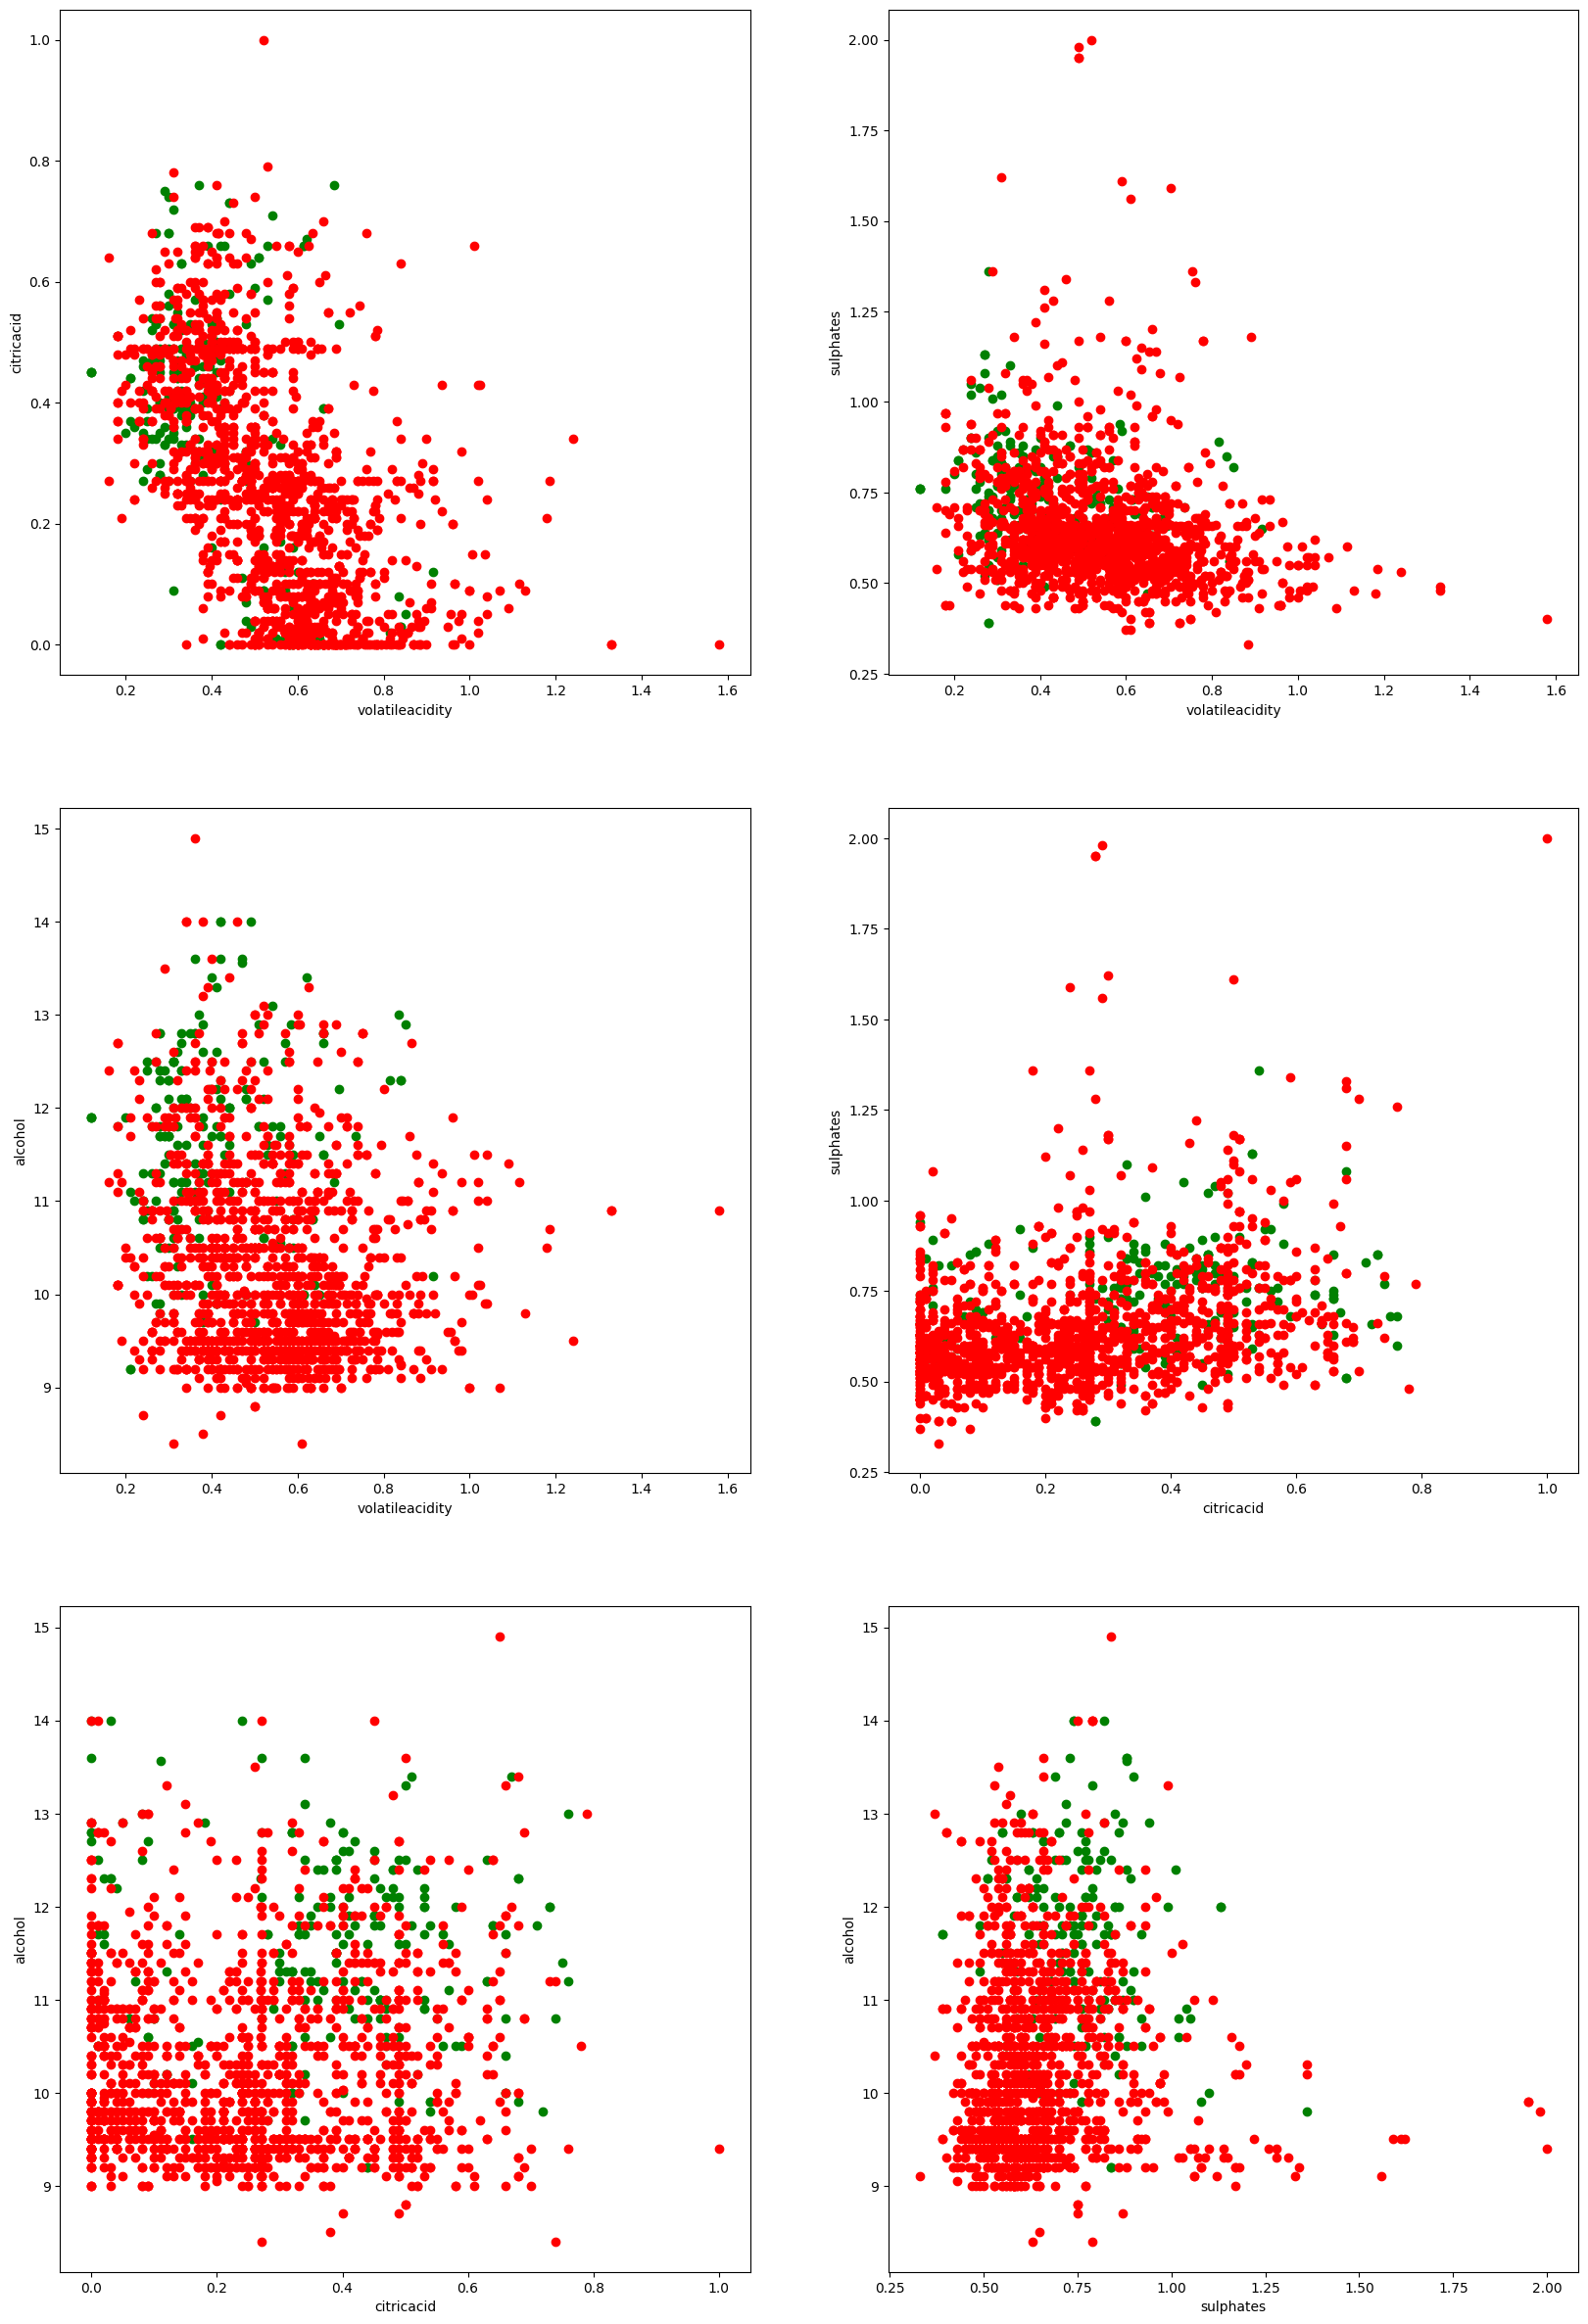

In [24]:
import itertools

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 30))

good = data.query('quality == 1')
bad = data.query('quality == 0')

i,j = 0,0
for comb in itertools.combinations(['volatileacidity', 'citricacid', 'sulphates', 'alcohol'], 2):
    ax[i,j].scatter(x = good[comb[0]], y = good[comb[1]], c = 'green')
    ax[i,j].scatter(x = bad[comb[0]], y = bad[comb[1]], c = 'red')
    ax[i,j].set_xlabel(comb[0])
    ax[i,j].set_ylabel(comb[1])

    j+=1
    if j==2:
        i+=1
        j=0
    

## 7. Ingeniería de variables

- La ingeniería de variables, o feature engineering, consiste en la creación de nuevas variables, ya sea como combinación de las ya existentes. 
- El objetivo de este paso es generar variables que mejoren la calidad de nuestro conjunto de datos.

In [25]:
data.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
data['totalacidity'] = data['fixedacidity'] + data['volatileacidity']

In [27]:
data['Fixedsulfurdioxide'] = data['totalsulfurdioxide'] - data['freesulfurdioxide']

In [28]:
data['mso2'] = data['freesulfurdioxide'] / (1 + np.power(10, data['pH']-1.81))

In [29]:
data.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,totalacidity,Fixedsulfurdioxide,mso2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.560000,9.4,0,8.10,23.0,0.215185
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.658896,9.8,0,8.68,42.0,0.978585
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.650000,9.8,0,8.56,39.0,0.513983
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.580000,9.8,0,11.48,43.0,0.726893
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.560000,9.4,0,8.10,23.0,0.215185


<Axes: >

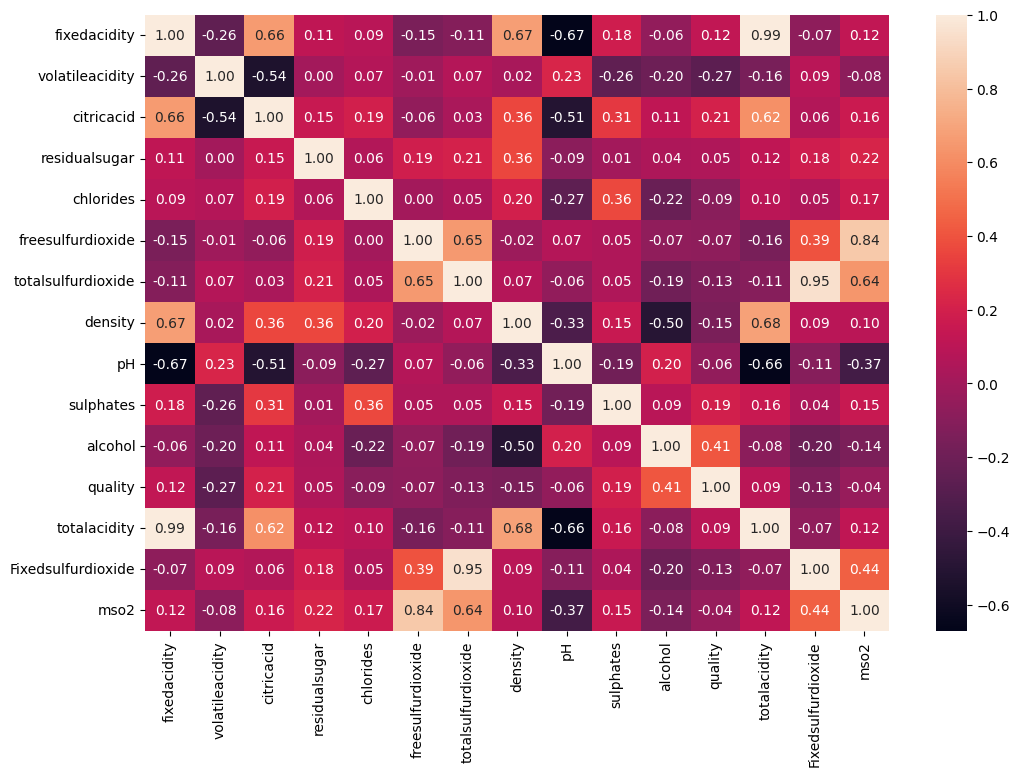

In [30]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr(), annot=True, fmt = '.2f')

#### Normalización de distribuciones

5.7785175034034815
43.62817604081133


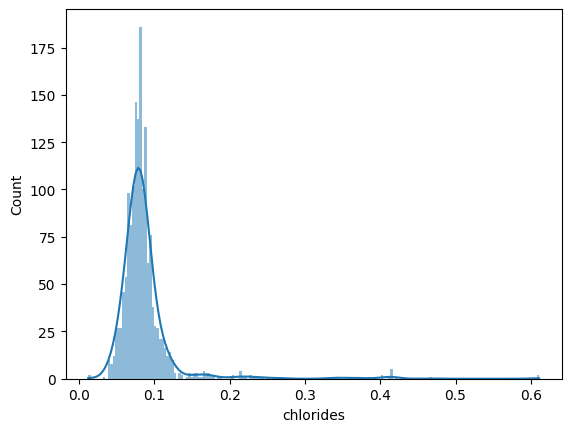

In [67]:
sns.histplot(data['chlorides'], kde = True, linewidth = 0)
print(data['chlorides'].skew())
print(data['chlorides'].kurt())

Vamos a transformar esa variable, aplicando el logaritmo a la misma.

In [32]:
data['chlorides_log'] = np.log(data['chlorides'])

1.7248588638338684
9.733092436161924


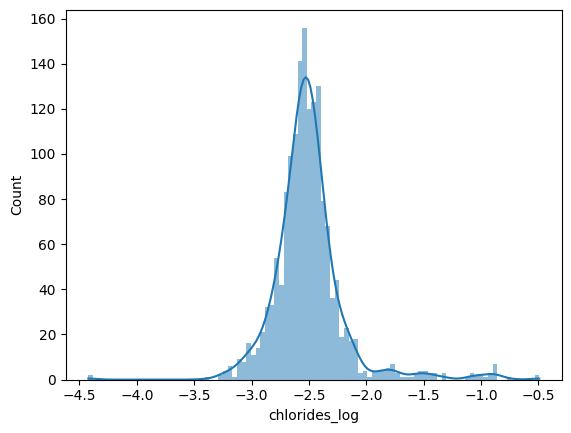

In [66]:
sns.histplot(data['chlorides_log'], kde = True, linewidth = 0)
print(data['chlorides_log'].skew())
print(data['chlorides_log'].kurt())

1.250567293314441
2.023562045840575


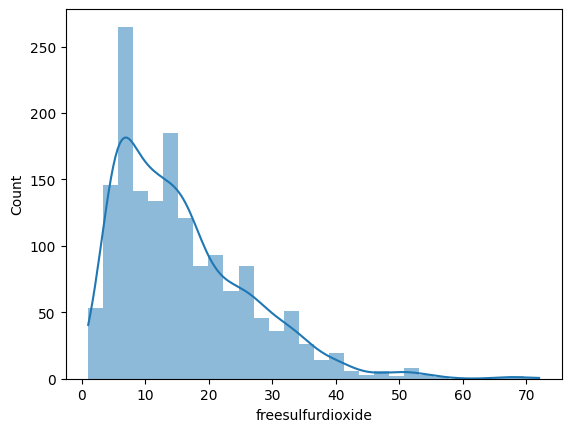

In [65]:
sns.histplot(data['freesulfurdioxide'], kde = True, linewidth = 0)
print(data['freesulfurdioxide'].skew())
print(data['freesulfurdioxide'].kurt())

<Axes: >

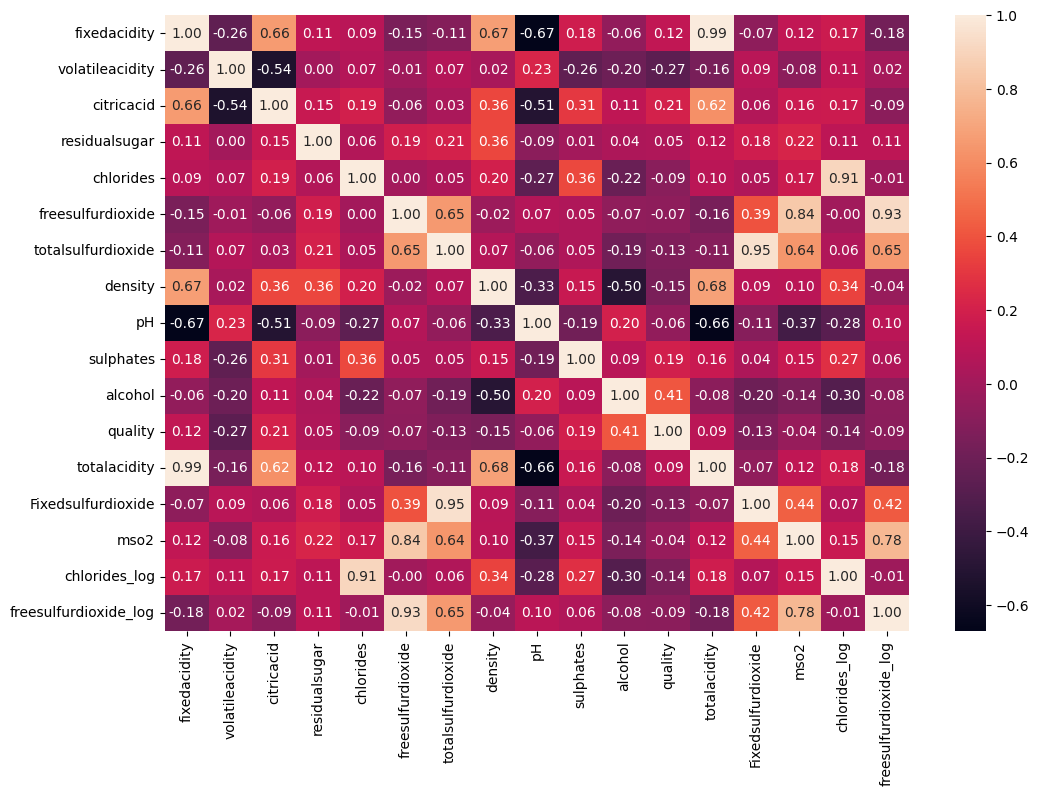

In [69]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.heatmap(data.corr(), annot=True, fmt = '.2f')

Vamos a transformar esa variable, aplicando el logaritmo a la misma.

In [35]:
data['freesulfurdioxide_log'] = np.log(data['freesulfurdioxide'])

-0.23403124715031437
-0.4620589800803274


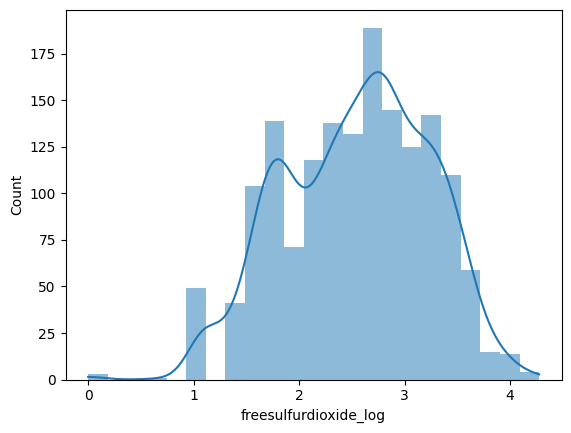

In [68]:
sns.histplot(data['freesulfurdioxide_log'], kde = True, linewidth = 0)
print(data['freesulfurdioxide_log'].skew())
print(data['freesulfurdioxide_log'].kurt())

## 8. Importancia de variables

En nuestro caso, vamos a calcular la importancia de variables haciendo uso directamente de un modelo de clasificación. 

`Modelo basado en árboles`

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [38]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['quality'], random_state = 1234)

In [39]:
X_train = train.drop('quality', axis = 1)
y_train = train['quality']

X_test = test.drop('quality', axis = 1)
y_test = test['quality']

In [40]:
y_train.value_counts(normalize = True)

quality
0    0.864164
1    0.135836
Name: proportion, dtype: float64

In [41]:
y_test.value_counts(normalize = True)

quality
0    0.864583
1    0.135417
Name: proportion, dtype: float64

### Basado en árbol

In [72]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=1234)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [43]:
dtc.feature_importances_

array([0.        , 0.10891815, 0.        , 0.02383859, 0.        ,
       0.05819285, 0.        , 0.        , 0.07623855, 0.14795165,
       0.58486021, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [44]:
feature_importance = pd.Series(dtc.feature_importances_, index = X_train.columns)
imp = feature_importance[feature_importance > 0]
imp

volatileacidity      0.108918
residualsugar        0.023839
freesulfurdioxide    0.058193
pH                   0.076239
sulphates            0.147952
alcohol              0.584860
dtype: float64

Text(0.5, 1.0, 'Importancia de variables')

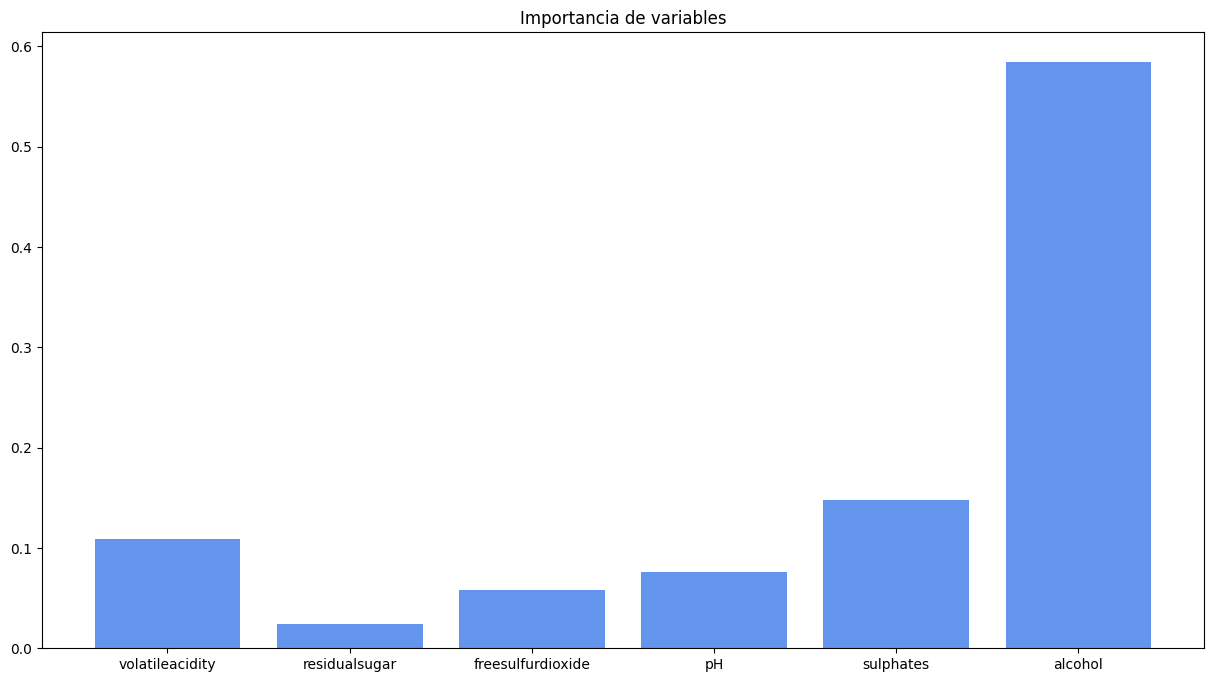

In [45]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = imp.index, height = imp.values, color = 'cornflowerblue')

ax.set_title('Importancia de variables')

### Usando técnica como "SelectFromModel"

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [76]:
lr = LogisticRegression()

sfm = SelectFromModel(estimator=lr)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression())

In [78]:
sfm.estimator_.coef_

array([[ 1.06027507e+00, -2.15749375e+00, -2.11868673e-01,
         1.31255849e-01, -4.85690585e-01,  3.38788193e-04,
        -8.45019182e-03, -1.14324800e+00, -3.25830106e+00,
         2.12550885e+00,  9.32740305e-01, -1.09721868e+00,
        -8.78898002e-03, -3.45221003e-01, -8.55083547e-01,
         1.32911249e-01]])

In [80]:
fi = pd.Series(sfm.estimator_.coef_[0], index = X_train.columns)
fi

fixedacidity             1.060275
volatileacidity         -2.157494
citricacid              -0.211869
residualsugar            0.131256
chlorides               -0.485691
freesulfurdioxide        0.000339
totalsulfurdioxide      -0.008450
density                 -1.143248
pH                      -3.258301
sulphates                2.125509
alcohol                  0.932740
totalacidity            -1.097219
Fixedsulfurdioxide      -0.008789
mso2                    -0.345221
chlorides_log           -0.855084
freesulfurdioxide_log    0.132911
dtype: float64

In [79]:
sfm.get_support()

array([ True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False])

In [82]:
vars_selected = fi[sfm.get_support()].sort_values()
vars_selected

pH                -3.258301
volatileacidity   -2.157494
density           -1.143248
totalacidity      -1.097219
alcohol            0.932740
fixedacidity       1.060275
sulphates          2.125509
dtype: float64

Text(0.5, 1.0, 'Importancia de variables')

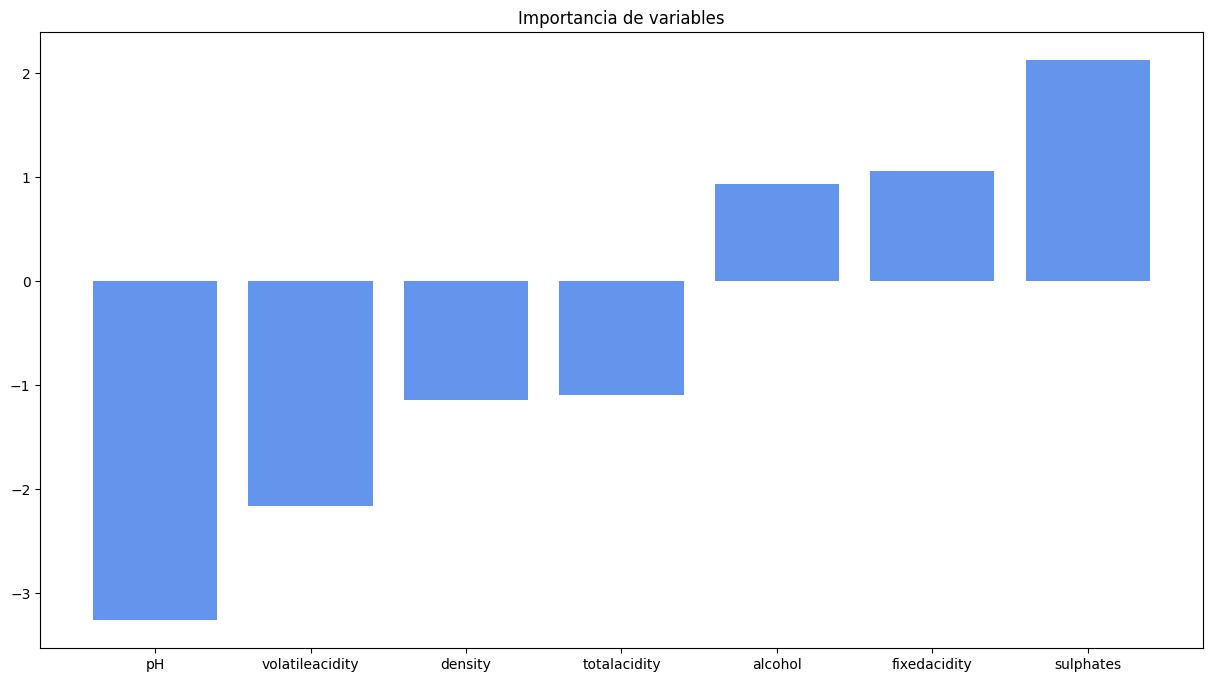

In [84]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = vars_selected.index, height = vars_selected.values, color = 'cornflowerblue')

ax.set_title('Importancia de variables')